<a href="https://colab.research.google.com/github/Adrianosh3/NeuronaleNetze/blob/Finale-Codes-zum-Dr%C3%BCberschaun/fastai_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [16]:
bs = 32
epochs = 4

In [10]:
path = Path('/content/drive/MyDrive/NN_WS2021/Projekt/train')
path_img = path/'.'

In [11]:
fnames = get_image_files(path_img)

len(fnames)
fnames[:5]

[PosixPath('/content/drive/MyDrive/NN_WS2021/Projekt/train/dog.9099.jpg'),
 PosixPath('/content/drive/MyDrive/NN_WS2021/Projekt/train/dog.91.jpg'),
 PosixPath('/content/drive/MyDrive/NN_WS2021/Projekt/train/dog.910.jpg'),
 PosixPath('/content/drive/MyDrive/NN_WS2021/Projekt/train/dog.9100.jpg'),
 PosixPath('/content/drive/MyDrive/NN_WS2021/Projekt/train/dog.9101.jpg')]

In [12]:
np.random.seed(2)
pat = r'([^/]+)\.\d+.jpg$'

In [13]:
data = ImageDataBunch.from_name_re(path_img, 
                                   fnames, 
                                   pat, 
                                   ds_tfms=get_transforms(), 
                                   size=224, 
                                   bs=bs
                                  ).normalize(imagenet_stats)

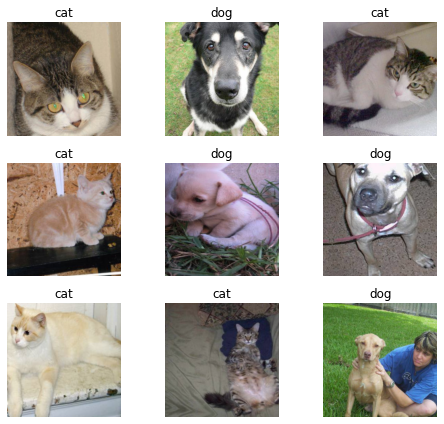

In [14]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes)

['cat', 'dog']


2

resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.model

In [ ]:
learn.fit_one_cycle(epochs, 1e-3)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

Ergebnisse

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=120)

In [ ]:
interp.most_confused(min_val=2)

Unfreezing, fine-tuning and learning rates

In [ ]:
learn.load('stage-1');

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find(stop_div=False, num_it=100)
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(epochs, max_lr=slice(10e-6,10e-4))

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
learn.recorder.plot_losses()

In [ ]:
interp_unfreeze = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp_unfreeze.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp_unfreeze.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp_unfreeze.plot_confusion_matrix(figsize=(3,3), dpi=120)

In [ ]:
interp_unfreeze.most_confused(min_val=2)

Ab hier Resnet50

In [17]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [18]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [19]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time


Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [20]:
learn.fit_one_cycle(epochs, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.135480,0.053925,0.981000,1:33:03
1,0.074359,0.032159,0.987000,11:39
2,0.045223,0.021793,0.992400,11:39
3,0.030067,0.016504,0.993600,11:39


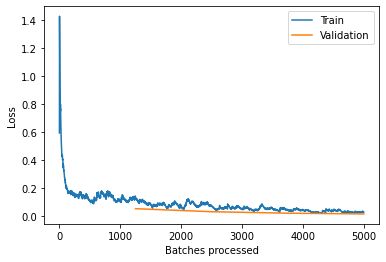

In [21]:
learn.recorder.plot_losses()

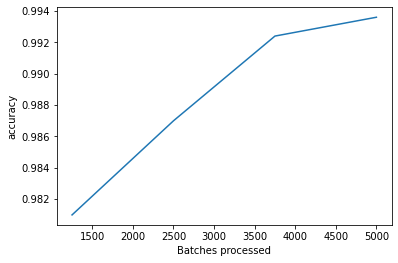

In [22]:
learn.recorder.plot_metrics()

In [23]:
interp_resnet = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp_resnet.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

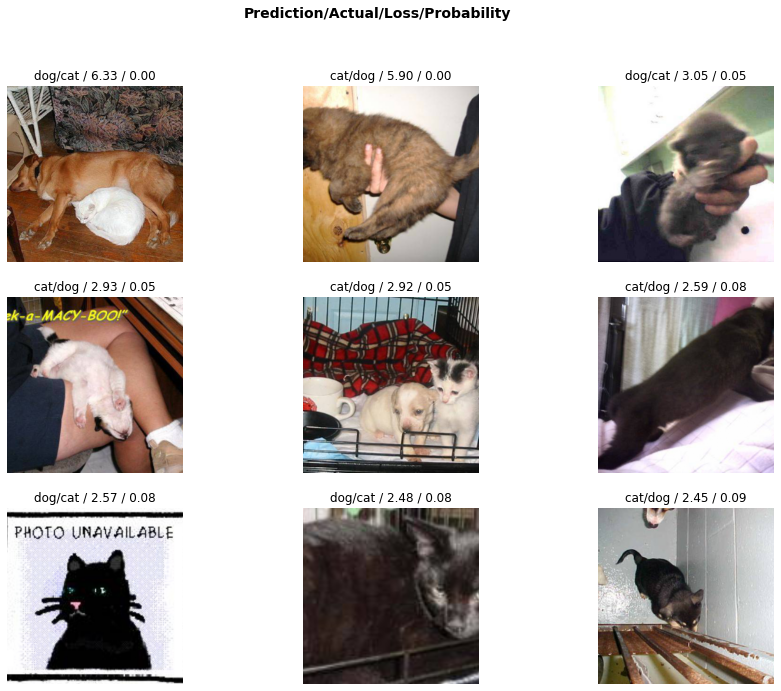

In [24]:
interp_resnet.plot_top_losses(9, figsize=(15,11))

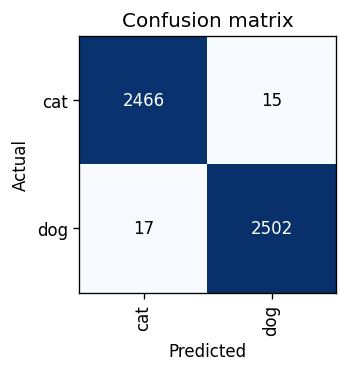

In [25]:
interp_resnet.plot_confusion_matrix(figsize=(3,3), dpi=120)

In [26]:
learn.save('stage-1-50')

Unfreeze:

In [27]:
learn.unfreeze()
learn.fit_one_cycle(epochs, max_lr=slice(10e-6,10e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.107243,0.071000,0.973800,15:23
1,0.093917,0.035705,0.988200,15:19
2,0.035475,0.027289,0.990000,15:19
3,0.026792,0.019304,0.993400,15:19


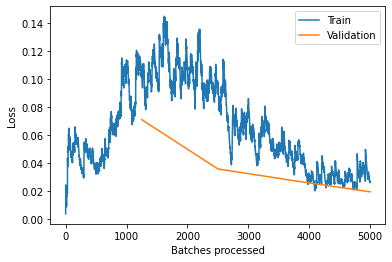

In [28]:
learn.recorder.plot_losses()

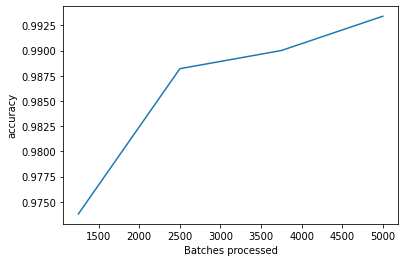

In [29]:
learn.recorder.plot_metrics()

In [30]:
interp_resnet = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp_resnet.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

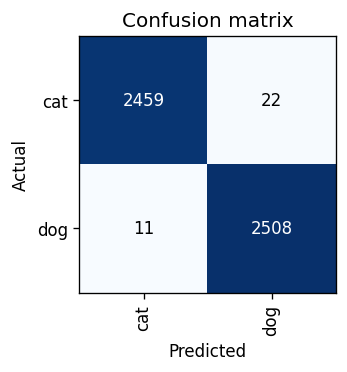

In [31]:
interp_resnet.plot_confusion_matrix(figsize=(3,3), dpi=120)